### Observable trends

The data shows that there is direct correlation between the availability of drivers and the average price of the rides. **Urban** cities have the largest number of available drivers and the lowest average ride prices; while **Rural** cities exhibited the complete opposite trend; lowest number of rides and highest average ride prices.

The same behavior is visible for the other two measures: percent of total rides and percent of total fares; with **Urban** cities having a higher share for both these metrics.

There are other variables that could cause the **Rural** and **Suburban** cities to have a higher average price per ride such as the distance traveled. It is reasonable to assume the in the **Urban** areas the rides may be shorter as patrons tend to travel shorter distances.

### Hidden trends

The last bubble plot shows the relationship between **Total Number of Rides**, **Average Fare (\$)** and **Average Fare Per Driver ($)** by **City Type**. It reveals that the drivers in **Suburban** and **Rural** cities enjoyed higher earnings in average than those in **Uban** cities. 


In [1]:
%matplotlib inline

In [2]:
# References
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read data
city_data_df = pd.read_csv("resources/city_data.csv")
ride_data_df = pd.read_csv("resources/ride_data.csv")

In [4]:
# Group the ride data by city
ride_data_df = ride_data_df.groupby("city")["fare"].agg([("Average Fare ($)","mean"),\
                                                         ("Total Fare","sum")]).\
                join(\
                ride_data_df.groupby("city")["ride_id"].agg([("Total Number of Rides","count")])).\
                reset_index()

In [5]:
# Merge both dataframes by city
city_ride_data_df = pd.merge(city_data_df,ride_data_df,on="city",how="left").fillna(0.000).\
                    rename(columns={"type":"City Type","city":"City","driver_count":"Driver Count"})

In [6]:
# Get totals and 
total_rides = city_ride_data_df["Total Number of Rides"].sum()
total_fares = city_ride_data_df["Total Fare"].sum()
total_drivers = city_ride_data_df["Driver Count"].sum()

In [7]:
# Set plot parameters
# Gold, Sky Blue, Coral
colors = ["#FFD700","#76D7EA","#FF7F50"]
autopct="%1.1f%%"
explodes = (0,0,0.15)
figsize=(8,5)

In [8]:
# Function to plot the bubble graph. It allows for changing the x, y axises and the s (area)
def bubbleplot(df, x_dim, y_dim, s_dim, classes):
    x  = df[x_dim]
    y  = df[y_dim]
    s  = df[s_dim]*3
    ct = df[classes]
    unique_city_type = ct.unique()
    ct_colors ={"Urban":"#FF7F50", "Suburban":"#76D7EA","Rural":"#FFD700"}

    fig, ax = plt.subplots(figsize=figsize)

    for i, city_type in enumerate(unique_city_type):
        xi = [x[j] for j  in range(len(x)) if ct[j] == city_type]
        yi = [y[j] for j  in range(len(x)) if ct[j] == city_type]
        si = [s[j] for j  in range(len(x)) if ct[j] == city_type]
        plt.scatter(x=xi, y=yi, s=si, c=ct_colors[city_type], label=str(city_type), 
                    alpha=0.8, linewidths=0.5, edgecolors="black")

        #print(f"i = {i} |(xi,yi,si) points = {len(xi)} | city_type = {city_type} ")

    lgnd = plt.legend(frameon=True,title=classes,loc="upper right")
    for handle in lgnd.legendHandles:
        handle.set_sizes([20])

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
    ax.set_title('Pyber Drive Sharing Data (2016)')
    ax.set_xlabel(f'{x_dim} (Per City)')
    ax.set_ylabel(y_dim)
    
    note = f"Note:\nCircle size correlates to {s_dim} per city"
    plt.text(0.92, 0.5, note, fontsize=10, transform=plt.gcf().transFigure)
    
    #print(f"{x_dim} (min:max) ({x.min()}:{x.max()})\n{y_dim} (min:max) ({y.min()}:{y.max()})\n{s_dim} (min:max) ({s.min()}:{s.max()})")
    
    plt.show()

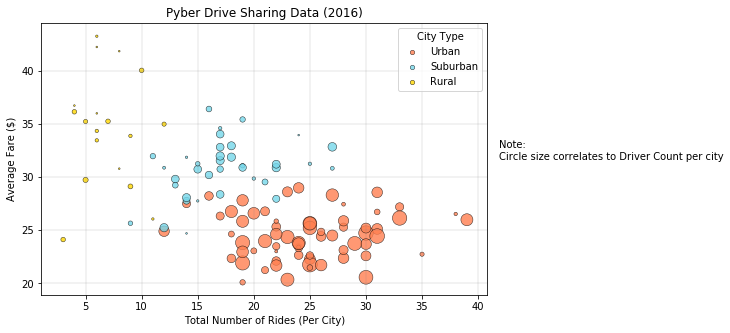

In [15]:
bubbleplot(city_ride_data_df,"Total Number of Rides", "Average Fare ($)", "Driver Count","City Type")

Text(0.5, 1.0, '% of Total Fares by City Type')

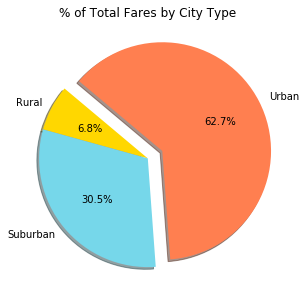

In [10]:
#% of Total Fares by City Type
fares_city_type = (city_ride_data_df.groupby("City Type")["Total Fare"].\
                                    agg([("% of Total Fare","sum")])/total_fares)

fares_plot = fares_city_type.plot.pie(["% of Total Fare"], 
                                      legend=False,
                                     explode=explodes,
                                     startangle=140,
                                     shadow=True,
                                     figsize=figsize,
                                     colors=colors,
                                     autopct=autopct)
                                      
fares_plot.set_ylabel("")       
fares_plot.set_title("% of Total Fares by City Type", fontsize=12)

Text(0.5, 1.0, '% of Total Rides by City Type')

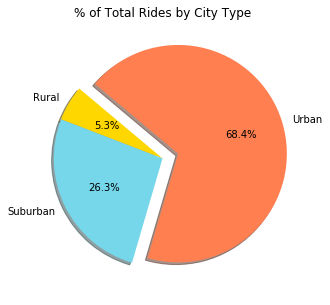

In [11]:
#% of Total Rides by City Type
rides_city_type = (city_ride_data_df.groupby("City Type")["Total Number of Rides"].\
                                      agg([("% of Total Rides","sum")])/total_rides)

rides_plot = rides_city_type.plot.pie(["% of Total Rides"], \
                                      legend=False,\
                                     explode=explodes,\
                                     startangle=140,
                                     figsize=figsize,
                                     shadow=True,
                                     colors=colors,\
                                     autopct=autopct)
                                      
rides_plot.set_ylabel("")       
rides_plot.set_title("% of Total Rides by City Type", fontsize=12)


Text(0.5, 1.0, '% of Total Drivers by City Type')

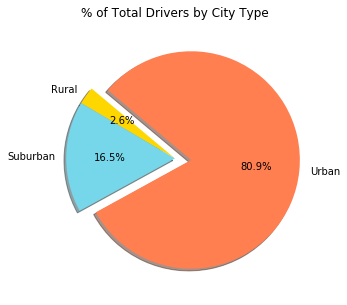

In [12]:
#% of Total Drivers by City Type
drivers_city_type = (city_ride_data_df.groupby("City Type")["Driver Count"].\
                                      agg([("% of Total Drivers","sum")])/total_drivers)
drivers_plot = drivers_city_type.plot.pie(["% of Total Drivers"], 
                                      legend=False,
                                     explode=explodes,
                                     startangle=140,
                                     figsize=figsize,
                                     shadow=True,
                                     colors=colors,
                                     autopct=autopct)
                                      
drivers_plot.set_ylabel("")       
drivers_plot.set_title("% of Total Drivers by City Type", fontsize=12)

In [13]:
city_ride_data_df["Average Fare Per Driver ($)"] = city_ride_data_df["Total Fare"]/\
                                                    city_ride_data_df["Driver Count"]

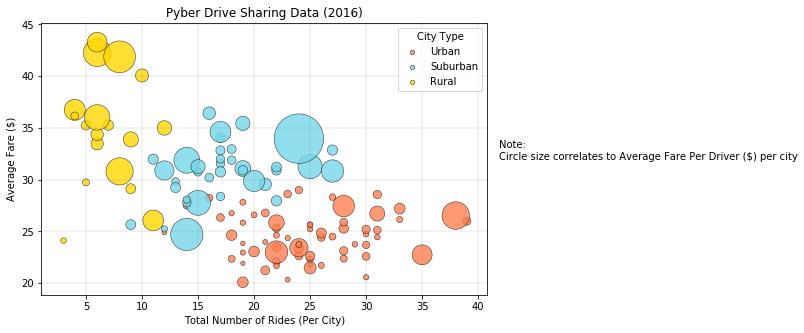

In [14]:
bubbleplot(city_ride_data_df,"Total Number of Rides", "Average Fare ($)", "Average Fare Per Driver ($)","City Type")